In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plane = pd.read_csv('./dataverse_files/plane-data.csv')
plane = plane.dropna()
plane.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [3]:
flight_2008 = pd.read_csv('./dataverse_files/2008.csv')
flight_2007 = pd.read_csv('./dataverse_files/2007.csv')
flight_2006 = pd.read_csv('./dataverse_files/2006.csv')

flight = pd.concat([flight_2006, flight_2007, flight_2008])
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [4]:
flight_plane = flight.join(plane.set_index('tailnum'), on='TailNum')
flight_plane.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0.0,0.0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0.0,0.0,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0.0,0.0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0.0,0.0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990


In [7]:
plane_delay = flight_plane.groupby('year').agg({'DepDelay': ['sum', 'mean']})
plane_delay

DepDelay           
             sum       mean
year                       
0000    108296.0   8.462608
1956      9321.0  13.667155
1957     14362.0   7.060964
1959     74844.0  12.901913
1962     38031.0  11.705448
1963     50881.0  13.564649
1964     41997.0  12.922154
1965     38881.0  12.951699
1966     47652.0  12.686901
1967    344811.0   7.748388
1968    607336.0   7.939344
1969    270529.0   6.902306
1970     45202.0   6.715495
1971     25727.0   7.779559
1972      6869.0  10.868671
1973     77964.0   8.369726
1974     48784.0  13.047339
1975    321277.0  10.855786
1976    285760.0   9.850057
1977    148297.0   9.608462
1978    226009.0   7.581142
1979    362442.0  10.498262
1980    266740.0  11.339058
1982    187517.0  14.366917
1983    536318.0  10.699398
1984    894946.0  11.463820
1985   3204910.0  10.762388
1986   3231415.0  11.823605
1987   4401537.0  11.243239
1988   5251172.0  11.516587
1989   3816748.0  11.130076
1990   4415355.0  11.104599
1991   4877718.0  11.253113
1992   4239017.0  10.612798
1993   3112684.0  10.342723
1994   4322093.0  11.820689
1995   3703909.0  10.341175
1996   4631368.0  10.395188
1997   5570401.0  13.435959
1998   8383922.0  10.690710
1999  10921945.0  11.095309
2000  10554214.0  10.192286
2001  12044767.0   9.287102
2002  11502122.0  11.085934
2003  11348994.0  11.455415
2004   9942447.0  11.385959
2005   7816150.0  11.105262
2006   4455095.0  11.043153
2007   1566348.0  10.690117
2008    100724.0  11.602811
None   4811304.0  11.423229

In [8]:
plane_delay_np = plane_delay.reset_index().to_numpy()

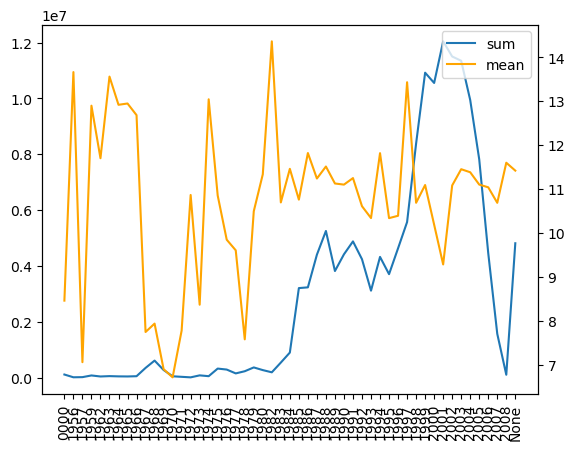

In [12]:
ax1 = plt.subplot(1, 1, 1)
l1, = ax1.plot(plane_delay_np[:,0], plane_delay_np[:,1], label='sum')
ax1.tick_params(axis='x', rotation=90)
ax11 = ax1.twinx()
l11, = ax11.plot(plane_delay_np[:,0], plane_delay_np[:,2], color='orange', label='mean')
plt.legend([l1, l11], ['sum', 'mean'])

- As shown in the figure, we mainly focus on the mean dep_delay group by plane's issue year.
- There are no relation between manufacturing year and mean dep_delay time. So older planes do not suffer more delays.